# Recidivism Project (Predictive Analysis)

#### Preparing & Cleaning both of the Data Sets

In [1]:
import pandas as pd
import numpy as np

def preprocess_data(df, is_test=False):
    # List of columns to keep
    columns_to_keep = [
        'ID', 'Gender', 'Race', 'Age_at_Release', 'Gang_Affiliated', 'Education_Level',
        'Dependents', 'Prison_Offense', 'Prison_Years', 'Prior_Arrest_Episodes_Felony',
        'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent',
        'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug',
        'Prior_Arrest_Episodes_PPViolationCharges', 'Prior_Arrest_Episodes_DVCharges',
        'Prior_Arrest_Episodes_GunCharges', 'Prior_Conviction_Episodes_Felony',
        'Prior_Conviction_Episodes_Misd', 'Prior_Conviction_Episodes_Viol',
        'Prior_Conviction_Episodes_Prop', 'Prior_Conviction_Episodes_Drug',
        'Prior_Conviction_Episodes_PPViolationCharges', 'Prior_Conviction_Episodes_DomesticViolenceCharges',
        'Prior_Conviction_Episodes_GunCharges', 'Recidivism_Within_3years'
    ]
    
    # Add dependent variables for training data
    if not is_test:
        columns_to_keep += [
            'Recidivism_Arrest_Year1', 'Recidivism_Arrest_Year2',
            'Recidivism_Arrest_Year3'
        ]
    
    # Exclude columns not in the dataset
    columns_to_keep = [col for col in columns_to_keep if col in df.columns]
    
    # Select columns to keep
    df = df[columns_to_keep]
    
    # Replace missing values in numeric columns with NaN and categorical columns with 'Unknown'
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    df[numeric_columns] = df[numeric_columns].fillna(np.nan)
    df = df.fillna('Unknown')
    
    # Check if there are any remaining missing values
    print("Number of missing values in each column after cleaning:")
    print(df.isnull().sum())
    
    # Replace "3 or more" with "3+"
    if 'Dependents' in df.columns:
        df['Dependents'] = df['Dependents'].replace('3 or more', '3+')
    
    # Columns to transform with "x or more" to "x+"
    columns_to_transform = [
        'Prior_Conviction_Episodes_Drug', 'Prior_Conviction_Episodes_Prop', 
        'Prior_Conviction_Episodes_Misd', 'Prior_Conviction_Episodes_Felony',
        'Prior_Arrest_Episodes_PPViolationCharges', 'Prior_Arrest_Episodes_Drug',
        'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Violent',
        'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Felony'
    ]
    
    # Define a function to replace "x or more" with "x+"
    def replace_or_more(value):
        if isinstance(value, str) and ' or more' in value:
            return value.replace(' or more', '+')
        return value
    
    # Apply the function to each column
    for col in columns_to_transform:
        if col in df.columns:
            df[col] = df[col].apply(replace_or_more)
        else:
            print(f"Column {col} not found in DataFrame.")
    
    # Define a mapping dictionary for "Prison Years"
    duration_mapping = {
        'More than 3 years': '3+ years',
        '1-2 years': '1-2 years',
        'Less than 1 year': '<1 year',
        'Greater than 2 to 3 years': '3+ years'
    }
    
    # Apply the mapping to "Prison Years"
    if 'Prison_Years' in df.columns:
        df['Prison_Years'] = df['Prison_Years'].replace(duration_mapping)
    
    # Define a mapping dictionary for "Education Level"
    education_mapping = {
        'At least some college': 'Some College',
        'Less than HS diploma': '< HS Diploma',
        'High School Diploma': 'High School Diploma'
    }
    
    # Apply the mapping to "Education Level"
    if 'Education_Level' in df.columns:
        df['Education_Level'] = df['Education_Level'].replace(education_mapping)
    
    # Columns to convert from string representations of boolean to actual boolean and then to integers
    columns_to_convert = [
        'Gang_Affiliated', 'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges',
        'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_PPViolationCharges',
        'Prior_Conviction_Episodes_DomesticViolenceCharges', 'Prior_Conviction_Episodes_GunCharges',
        'Employment_Exempt'
    ]
    
    # Add recidivism columns if not in test dataset
    if not is_test:
        columns_to_convert += [
            'Recidivism_Within_3years', 'Recidivism_Arrest_Year1',
            'Recidivism_Arrest_Year2', 'Recidivism_Arrest_Year3'
        ]
    
    # Function to convert string representations to boolean
    def str_to_bool(value):
        if isinstance(value, str):
            value = value.lower()
            if value == 'true':
                return True
            elif value == 'false':
                return False
        return bool(value)
    
    # Apply conversion for each column
    for col in columns_to_convert:
        if col in df.columns:
            df[col] = df[col].apply(str_to_bool).astype(int)
        else:
            print(f"Column {col} not found in DataFrame.")
    
    return df

# Paths to the datasets
train_data_path = '/Users/juliafangman/Documents/Capstone-Project-2024/NIJ_s_Recidivism_Challenge_Training_Dataset_20240723.csv'
test_data_path = '/Users/juliafangman/Documents/Capstone-Project-2024/NIJ_s_Recidivism_Challenge_Test_Dataset1_20240723.csv'

# Process training dataset
train_data = pd.read_csv(train_data_path)
train_data_clean = preprocess_data(train_data, is_test=False)
train_data_clean.to_csv('/Users/juliafangman/Documents/Capstone-Project-2024/cleaned_training_data.csv', index=False)

# Process testing dataset
test_data = pd.read_csv(test_data_path)
test_data_clean = preprocess_data(test_data, is_test=True)

# Check if the cleaned test data is empty or has issues
print("Cleaned test data:")
print(test_data_clean.head())

# Save the cleaned test dataset
test_data_clean.to_csv('/Users/juliafangman/Documents/Capstone-Project-2024/cleaned_test_data1.csv', index=False)

print("Cleaned datasets saved to 'cleaned_training_data.csv' and 'cleaned_test_data1.csv'")


/var/folders/d5/skky3m813435ws6txfybb5780000gn/T/ipykernel_8689/4157927909.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = df[numeric_columns].fillna(np.nan)


Number of missing values in each column after cleaning:
ID                                                   0
Gender                                               0
Race                                                 0
Age_at_Release                                       0
Gang_Affiliated                                      0
Education_Level                                      0
Dependents                                           0
Prison_Offense                                       0
Prison_Years                                         0
Prior_Arrest_Episodes_Felony                         0
Prior_Arrest_Episodes_Misd                           0
Prior_Arrest_Episodes_Violent                        0
Prior_Arrest_Episodes_Property                       0
Prior_Arrest_Episodes_Drug                           0
Prior_Arrest_Episodes_PPViolationCharges             0
Prior_Arrest_Episodes_DVCharges                      0
Prior_Arrest_Episodes_GunCharges                     0
Prior_Con

/var/folders/d5/skky3m813435ws6txfybb5780000gn/T/ipykernel_8689/4157927909.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = df[numeric_columns].fillna(np.nan)


Number of missing values in each column after cleaning:
ID                                                   0
Gender                                               0
Race                                                 0
Age_at_Release                                       0
Gang_Affiliated                                      0
Education_Level                                      0
Dependents                                           0
Prison_Offense                                       0
Prison_Years                                         0
Prior_Arrest_Episodes_Felony                         0
Prior_Arrest_Episodes_Misd                           0
Prior_Arrest_Episodes_Violent                        0
Prior_Arrest_Episodes_Property                       0
Prior_Arrest_Episodes_Drug                           0
Prior_Arrest_Episodes_PPViolationCharges             0
Prior_Arrest_Episodes_DVCharges                      0
Prior_Arrest_Episodes_GunCharges                     0
Prior_Con

# Model Selection, Prediction, & Evaluation w/ Visuals 
### (Logistic Regression, Random Forest Classifier, SVM Machine, Neural Net Models)

Predictions saved to 'predictions.csv'


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

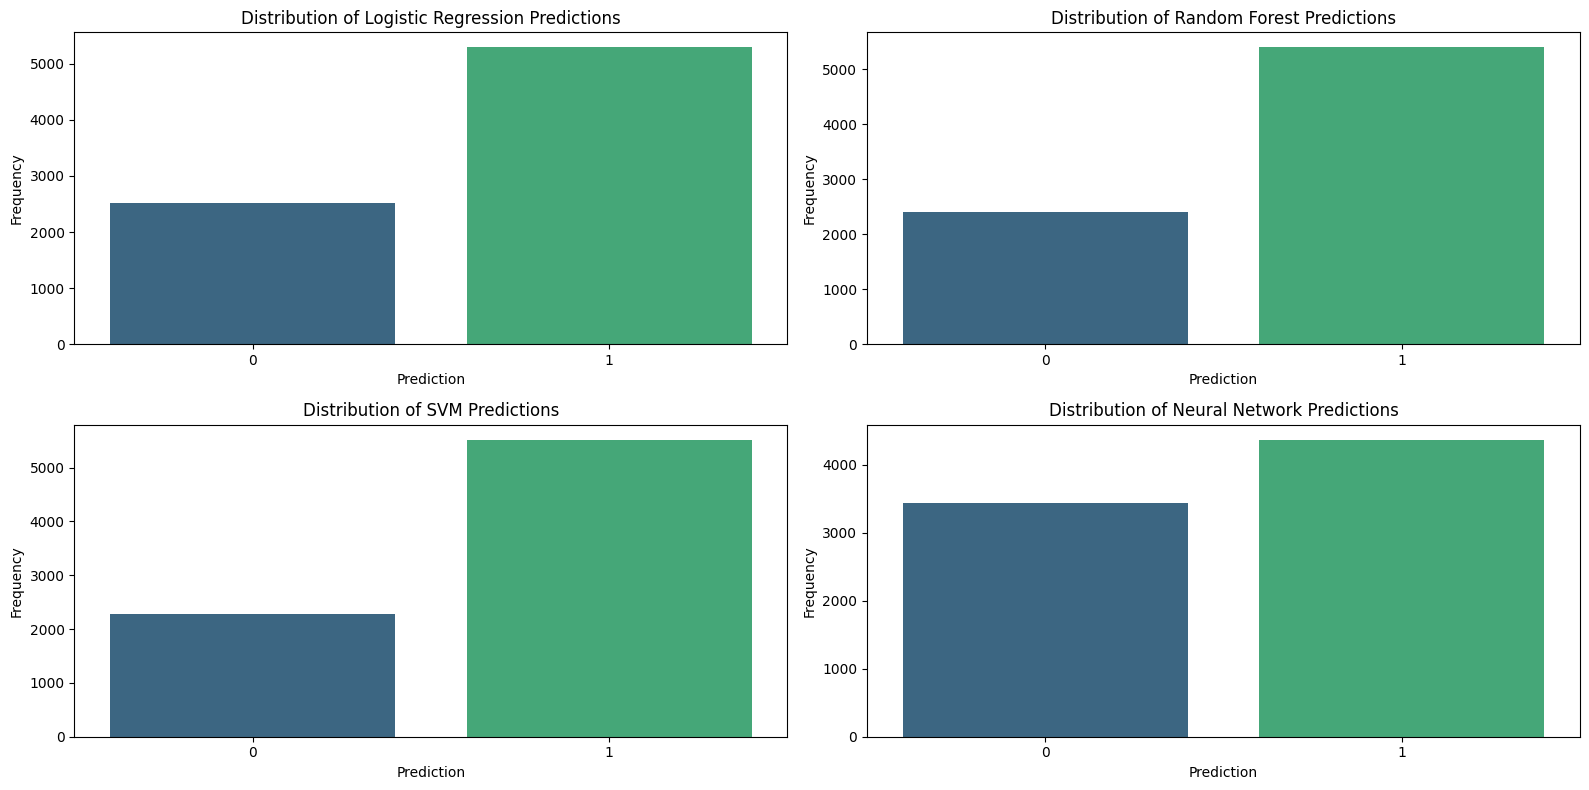

Descriptive Statistics for Predictions:
                                Count      Mean  Standard Deviation  Min  \
Logistic_Regression_Prediction   7807  0.678237            0.467182    0   
Random_Forest_Prediction         7807  0.691303            0.461986    0   
SVM_Prediction                   7807  0.706802            0.455258    0   
Neural_Network_Prediction        7807  0.559754            0.496448    0   

                                25th Percentile  Median  75th Percentile  Max  
Logistic_Regression_Prediction              0.0     1.0              1.0    1  
Random_Forest_Prediction                    0.0     1.0              1.0    1  
SVM_Prediction                              0.0     1.0              1.0    1  
Neural_Network_Prediction                   0.0     1.0              1.0    1  


In [6]:
# Import needed Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load cleaned datasets
train_path = '/Users/juliafangman/Documents/Capstone-Project-2024/cleaned_training_data.csv'
test_path = '/Users/juliafangman/Documents/Capstone-Project-2024/cleaned_test_data1.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Define target variable and feature columns
target = 'Recidivism_Within_3years'
target_columns = ['Recidivism_Arrest_Year1', 'Recidivism_Arrest_Year2', 'Recidivism_Arrest_Year3']

# Exclude target columns and the target variable from the features
features = [col for col in train_df.columns if col not in target_columns + [target]]

# Identify categorical columns
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()
categorical_features = [col for col in categorical_features if col in features]

# Identify numerical columns
numerical_features = [col for col in features if col not in categorical_features]

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Create and fit model pipelines
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True))  # SVM with probability estimates
])

nn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(max_iter=1000))  # Neural Network
])

# Separate features and target variable in training data
X_train = train_df[features]
y_train = train_df[target]

# Train models
log_reg_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)
svm_pipeline.fit(X_train, y_train)
nn_pipeline.fit(X_train, y_train)

# Prepare test data (ensure no target columns are included)
X_test = test_df[features]

# Predict on the test data
y_test_pred_log_reg = log_reg_pipeline.predict(X_test)
y_test_pred_rf = rf_pipeline.predict(X_test)
y_test_pred_svm = svm_pipeline.predict(X_test)
y_test_pred_nn = nn_pipeline.predict(X_test)

# Save predictions to a DataFrame
predictions_df = pd.DataFrame({
    'ID': test_df['ID'],  # Assuming 'ID' is a column to identify each row
    'Logistic_Regression_Prediction': y_test_pred_log_reg,
    'Random_Forest_Prediction': y_test_pred_rf,
    'SVM_Prediction': y_test_pred_svm,
    'Neural_Network_Prediction': y_test_pred_nn
})

predictions_df.to_csv('/Users/juliafangman/Documents/Capstone-Project-2024/predictions.csv', index=False)
print("Predictions saved to 'predictions.csv'")

# Load predictions
predictions_path = '/Users/juliafangman/Documents/Capstone-Project-2024/predictions.csv'
predictions_df = pd.read_csv(predictions_path)

# Create a distribution plot for the predictions
plt.figure(figsize=(16, 8))

# Plot distribution of Logistic Regression predictions
plt.subplot(2, 2, 1)
sns.countplot(x='Logistic_Regression_Prediction', data=predictions_df, palette='viridis')
plt.title('Distribution of Logistic Regression Predictions')
plt.xlabel('Prediction')
plt.ylabel('Frequency')

# Plot distribution of Random Forest predictions
plt.subplot(2, 2, 2)
sns.countplot(x='Random_Forest_Prediction', data=predictions_df, palette='viridis')
plt.title('Distribution of Random Forest Predictions')
plt.xlabel('Prediction')
plt.ylabel('Frequency')

# Plot distribution of SVM predictions
plt.subplot(2, 2, 3)
sns.countplot(x='SVM_Prediction', data=predictions_df, palette='viridis')
plt.title('Distribution of SVM Predictions')
plt.xlabel('Prediction')
plt.ylabel('Frequency')

# Plot distribution of Neural Network predictions
plt.subplot(2, 2, 4)
sns.countplot(x='Neural_Network_Prediction', data=predictions_df, palette='viridis')
plt.title('Distribution of Neural Network Predictions')
plt.xlabel('Prediction')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate descriptive statistics for predictions
descriptive_stats = pd.DataFrame({
    'Count': predictions_df[['Logistic_Regression_Prediction', 'Random_Forest_Prediction', 'SVM_Prediction', 'Neural_Network_Prediction']].count(),
    'Mean': predictions_df[['Logistic_Regression_Prediction', 'Random_Forest_Prediction', 'SVM_Prediction', 'Neural_Network_Prediction']].mean(),
    'Standard Deviation': predictions_df[['Logistic_Regression_Prediction', 'Random_Forest_Prediction', 'SVM_Prediction', 'Neural_Network_Prediction']].std(),
    'Min': predictions_df[['Logistic_Regression_Prediction', 'Random_Forest_Prediction', 'SVM_Prediction', 'Neural_Network_Prediction']].min(),
    '25th Percentile': predictions_df[['Logistic_Regression_Prediction', 'Random_Forest_Prediction', 'SVM_Prediction', 'Neural_Network_Prediction']].quantile(0.25),
    'Median': predictions_df[['Logistic_Regression_Prediction', 'Random_Forest_Prediction', 'SVM_Prediction', 'Neural_Network_Prediction']].median(),
    '75th Percentile': predictions_df[['Logistic_Regression_Prediction', 'Random_Forest_Prediction', 'SVM_Prediction', 'Neural_Network_Prediction']].quantile(0.75),
    'Max': predictions_df[['Logistic_Regression_Prediction', 'Random_Forest_Prediction', 'SVM_Prediction', 'Neural_Network_Prediction']].max()
})

# Print the descriptive statistics table
print("Descriptive Statistics for Predictions:")
print(descriptive_stats)


In [13]:
from sklearn.model_selection import cross_val_score

# Define a function to evaluate models using cross-validation
def evaluate_model_cv(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')  
    return {
        'mean_accuracy': scores.mean(),
        'std_accuracy': scores.std()
    }

# Evaluate models using cross-validation
log_reg_metrics = evaluate_model_cv(log_reg_pipeline, X_train, y_train)
rf_metrics = evaluate_model_cv(rf_pipeline, X_train, y_train)
svm_metrics = evaluate_model_cv(svm_pipeline, X_train, y_train)
nn_metrics = evaluate_model_cv(nn_pipeline, X_train, y_train)

# Print metrics
print("Logistic Regression Metrics:")
print(log_reg_metrics)
print("Random Forest Metrics:")
print(rf_metrics)
print("SVM Metrics:")
print(svm_metrics)
print("Neural Network Metrics:")
print(nn_metrics)


Logistic Regression Metrics:
{'mean_accuracy': 0.6774467119448785, 'std_accuracy': 0.008964283241195884}
Random Forest Metrics:
{'mean_accuracy': 0.5943536854510474, 'std_accuracy': 0.09744002766545344}
SVM Metrics:
{'mean_accuracy': 0.6650774214343025, 'std_accuracy': 0.010018885464562814}
Neural Network Metrics:
{'mean_accuracy': 0.5900271315414363, 'std_accuracy': 0.00797212545191594}


# Tableau Visual

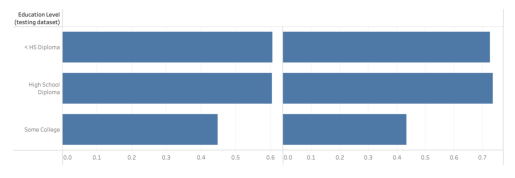

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('/Users/juliafangman/Desktop/Screenshot 2024-07-27 at 1.26.37 PM.png')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes ticks
plt.show()

#  Summary of Predictive Analysis

The above scripts import and clean training and testing datasets to match the `cleaned_recidivism_data.csv` in `RecidivismProject.ipynb`. A Python script then sets up a pipeline for the data and four supervised learning models, which are trained on the training set (X=features, Y=target). The models predict recidivism outcomes on the testing set and output the results into `predictions.csv`. Distribution plots and descriptive statistics are generated for each model, and cross-validation is used to evaluate their performance. Finally, a Tableau plot visualizes model performance (Logistic Regression) against true recidivism values across education levels.